# **Compressive Strength Concrete Assignment**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
data=pd.read_csv('/content/drive/MyDrive/DL Assignments/compresive_strength_concrete.csv')

In [75]:
data.shape

(1030, 9)

In [76]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [77]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [78]:
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [79]:
X_train = data.sample(frac = 0.7, random_state = 123)
X_test = data.drop(X_train.index)

In [80]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


In [81]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]

In [82]:
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std

In [83]:
Y_mean = Y_train.mean()
Y_train -= Y_mean
Y_std = Y_train.std()
Y_train /= Y_std
Y_test -= Y_mean
Y_test /= Y_std

In [84]:
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [85]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [118]:
# Model Architecture
from tensorflow.keras import layers
from tensorflow.keras import models
model=models.Sequential()
model.add(layers.Dense(128,activation="relu",input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(1))

In [119]:
# Compilation
model.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [120]:
history = model.fit(X_train,Y_train,epochs=220,validation_split=0.3, batch_size = 16)

Epoch 1/220
32/32 [==============================] - 1s 7ms/step - loss: 0.5591 - mae: 0.5924 - val_loss: 0.4333 - val_mae: 0.5269
Epoch 2/220
32/32 [==============================] - 0s 3ms/step - loss: 0.3190 - mae: 0.4344 - val_loss: 0.3178 - val_mae: 0.4436
Epoch 3/220
32/32 [==============================] - 0s 3ms/step - loss: 0.2315 - mae: 0.3720 - val_loss: 0.2984 - val_mae: 0.4112
Epoch 4/220
32/32 [==============================] - 0s 3ms/step - loss: 0.1941 - mae: 0.3381 - val_loss: 0.2697 - val_mae: 0.4088
Epoch 5/220
32/32 [==============================] - 0s 3ms/step - loss: 0.1637 - mae: 0.3165 - val_loss: 0.2640 - val_mae: 0.3866
Epoch 6/220
32/32 [==============================] - 0s 4ms/step - loss: 0.1493 - mae: 0.3022 - val_loss: 0.2991 - val_mae: 0.4075
Epoch 7/220
32/32 [==============================] - 0s 3ms/step - loss: 0.1404 - mae: 0.2934 - val_loss: 0.2402 - val_mae: 0.3739
Epoch 8/220
32/32 [==============================] - 0s 3ms/step - loss: 0.1230 - m

In [121]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [122]:
# Evaluation
loss,mae=model.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1331 - mae: 0.2339


In [123]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

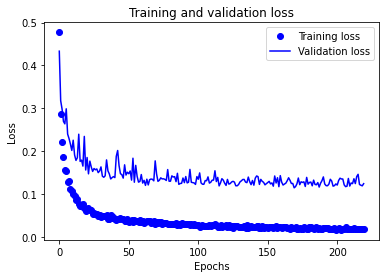

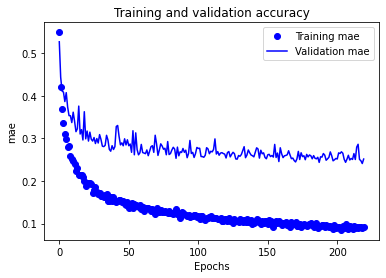

In [124]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(220)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [125]:
y_predict = model.predict(X_test)

In [126]:
def denormalise(x):
    return (x * Y_std) + Y_mean
    

In [127]:
y_predict = denormalise(y_predict)

In [128]:
y_true = denormalise(Y_test)

In [129]:
y_predict = y_predict.flatten()

In [130]:
y_predict.shape

(309,)

In [131]:
y_true.shape

(309,)

(0.0, 100.0)

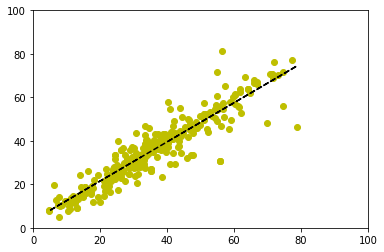

In [132]:
import numpy as np
import matplotlib.pyplot as plt
coef = np.polyfit(y_true,y_predict,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is a function which takes in x and returns an estimate for y
plt.plot(y_true,y_predict, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)